<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



<h1>Multiple Input and Output Channels</h1> 



<h3>Objective for this Notebook<h3>    
<h5> 1. Learn on Multiple Input and Multiple Output Channels.</h5>    




# Table of Contents
In this lab, you will study convolution and review how the different operations change the relationship between input and output.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Multiple Output Channels </a></li>

<li><a href="#ref1">Multiple Inputs</a></li>
<li><a href="#ref2">Multiple Input and Multiple Output Channels </a></li>
<li><a href="#ref3">Practice Questions </a></li>

<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>


Import the following libraries:


In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

<a id="ref0"></a>
<h2 align=center>Multiple Output Channels </h2>


In Pytroch, you can create a <code>Conv2d</code> object with multiple outputs. For each channel, a kernel is created, and each kernel performs a convolution independently. As a result, the number of outputs is equal to the number of channels. This is demonstrated in the following figure. The number 9 is convolved with three kernels: each of a different color. There are three different activation maps represented by the different colors.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmaps.png" width="750," align="center">


Symbolically, this can be represented as follows:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2activationmap2.png" width="500," align="center">


Create a <code>Conv2d</code> with three channels:


In [2]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

Pytorch randomly assigns values to each kernel. However, use kernels that have  been developed to detect edges:


In [3]:
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

Each kernel has its own bias, so set them all to zero:


In [4]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

Print out each kernel: 


In [5]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


Create an input <code>image</code> to represent the input X:


In [6]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

Plot it as an image: 


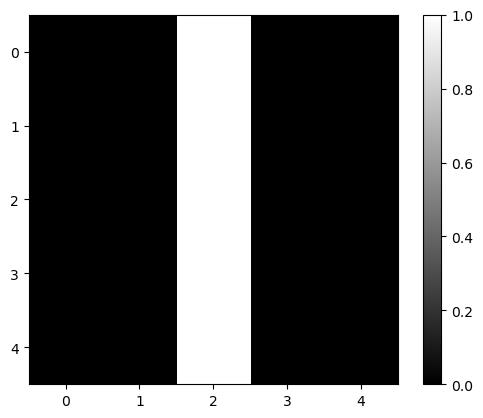

In [7]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Perform convolution using each channel: 


In [8]:
out=conv1(image)

The result is a 1x3x3x3 tensor. This represents one sample with three channels, and each channel contains a 3x3 image.  The same rules that govern the shape of each image were discussed in the last section.


In [9]:
out.shape

torch.Size([1, 3, 3, 3])

Print out each channel as a tensor or an image: 


tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


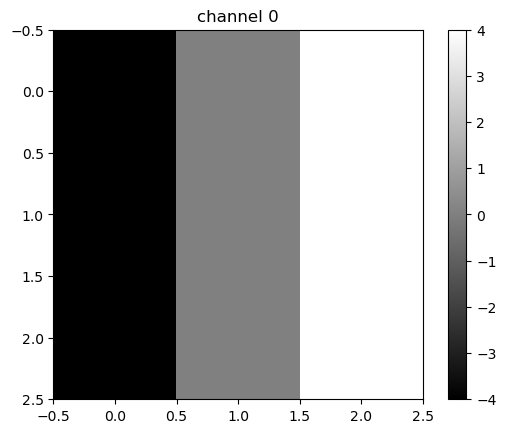

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


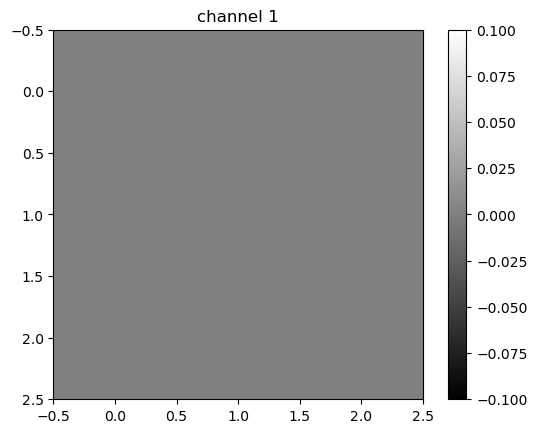

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


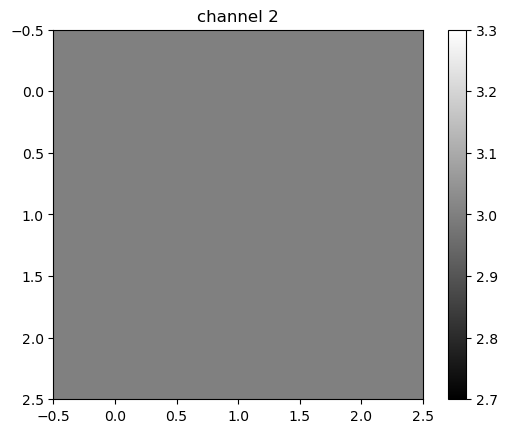

In [10]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Different kernels can be used to detect various features in an image. You can see that the first channel fluctuates, and the second two channels produce a constant value. The following figure summarizes the process:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2outputsgray.png" width="750," align="center">


If you use a different image, the result will be different: 


tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


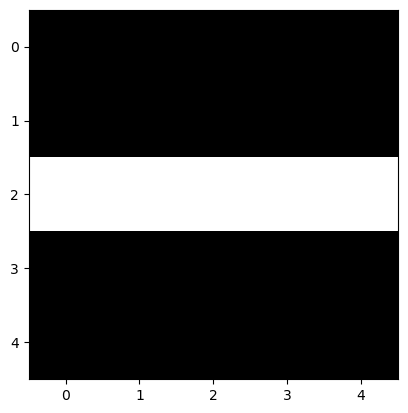

In [11]:
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In this case, the second channel fluctuates, and the first and the third channels produce a constant value.


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


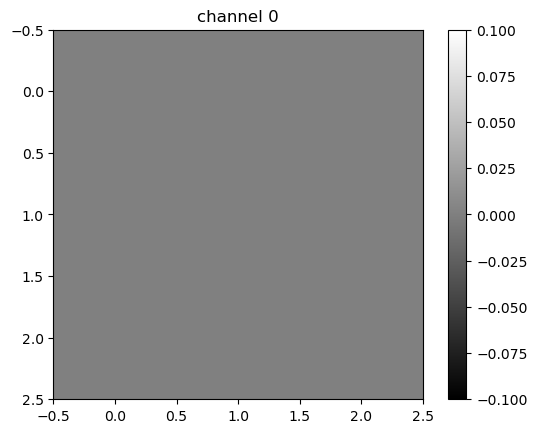

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


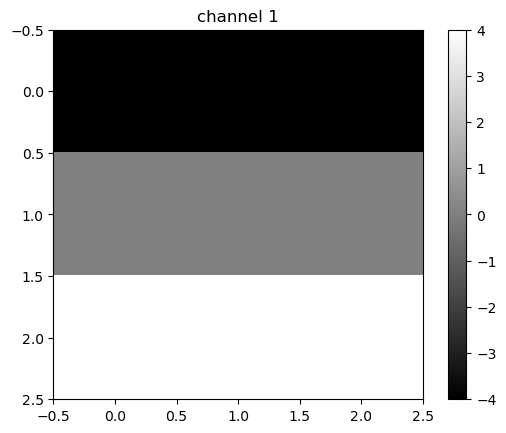

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


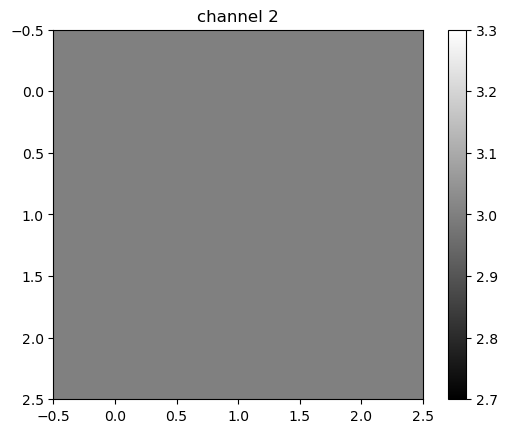

In [12]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

The following figure summarizes the process:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2ouputsgray2.png" width="750," align="center">


<a id="ref1"></a>
<h2 align=center>Multiple Input Channels </h2>


For two inputs, you can create two kernels. Each kernel performs a convolution on its associated input channel. The resulting output is added together as shown:  


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.22chanalsinput.png" width="750," align="center">


Create an input with two channels:


In [13]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

Plot out each image: 


tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


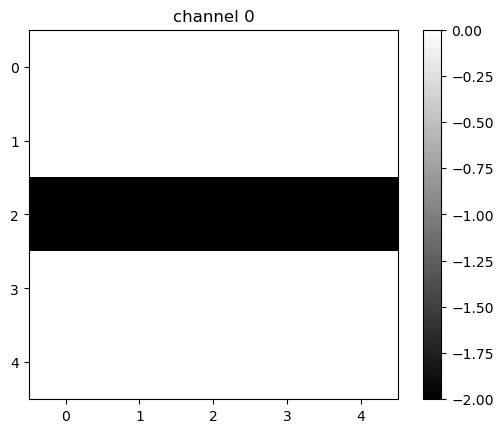

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


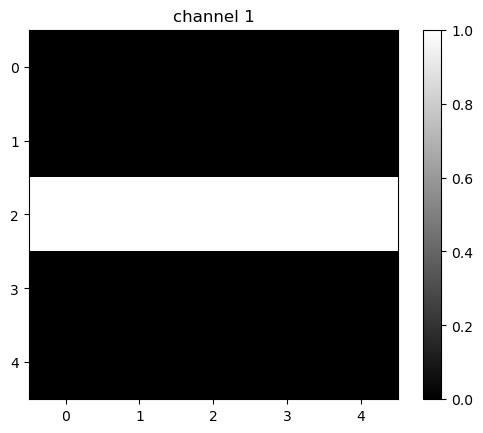

In [14]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Create a <code>Conv2d</code> object with two inputs:


In [15]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

Assign kernel values to make the math a little easier: 


In [16]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [17]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

Perform the convolution:


In [18]:
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

The following images summarize the process. The object performs Convolution.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example.png" width="750," align="center">


Then, it adds the result: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_two_channal_example2.png" width="750," align="center">


<a id="ref2"></a>

<h2>Multiple Input and Multiple Output Channels</h2>


When using multiple inputs and outputs, a kernel is created for each input, and the process is repeated for each output. The process is summarized in the following image. 

There are two input channels and 3 output channels. For each channel, the input in red and purple is convolved with an individual kernel that is colored differently. As a result, there are three outputs. 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2mulit_input_output.png" width="750," align="center">


Create an example with two inputs and three outputs and assign the kernel values to make the math a little easier: 


In [19]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

For each output, there is a bias, so set them all to zero: 


In [20]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

Create a two-channel image and plot the results: 


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


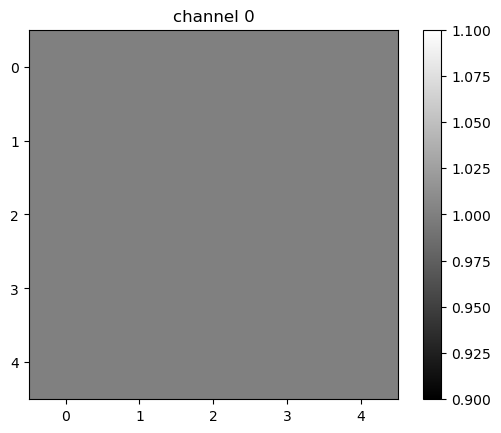

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


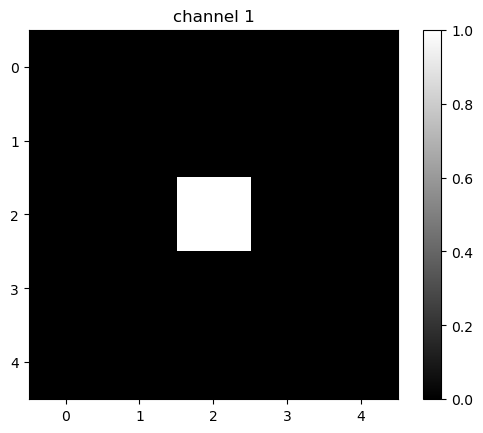

In [21]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

Perform the convolution:


In [22]:
z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

The output of the first channel is given by: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_1.png" width="750," align="center">


The output of the second channel is given by:


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_2.png" width="750," align="center">


The output of the third channel is given by: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2_%20multi_channel_3.png" width="750," align="center">


<a id="ref3"></a>

<h2>Practice Questions </h2>


Use the following two convolution objects to produce the same result as two input channel convolution on imageA and imageB as shown in the following image:


In [ ]:
imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2Practice%20Questions_1.png" width="750," align="center">


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.2Practice%20Questions_2.png" width="750," align="center">


Double-click __here__ for the solution.

<!-- Your answer is below:
conv5(imageA)+conv6(imageB)
-->





<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


### About the Authors:  
[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01), [Mavis Zhou](https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0110ENSkillsNetwork952-2022-01-01) 



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
